In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from base.eda import EDA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


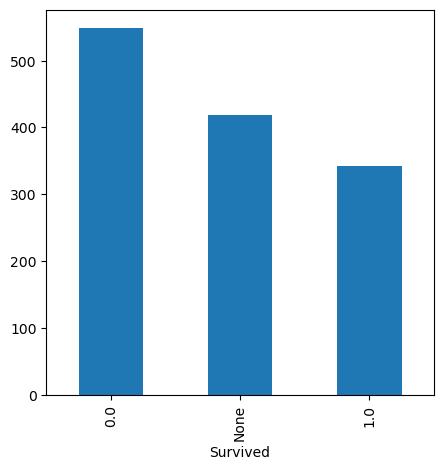

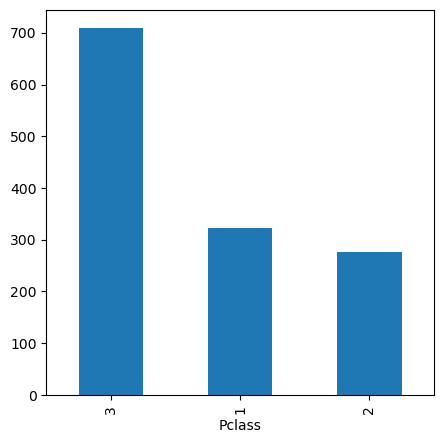

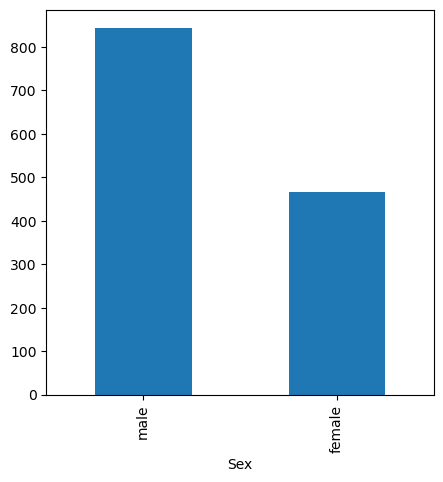

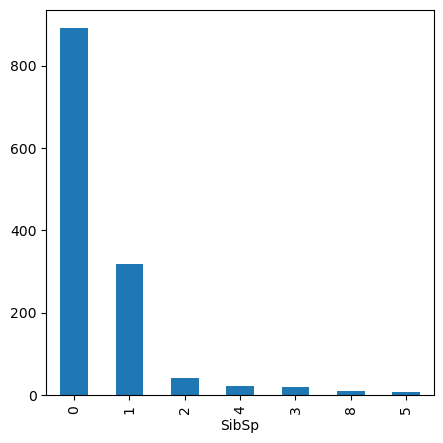

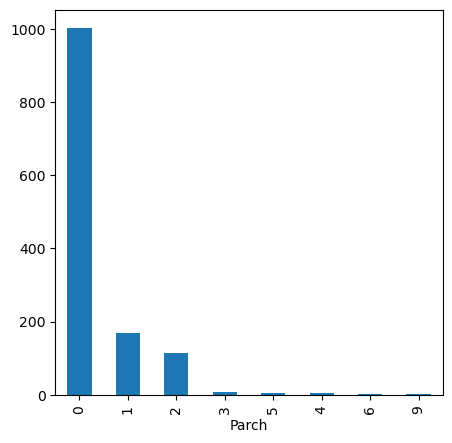

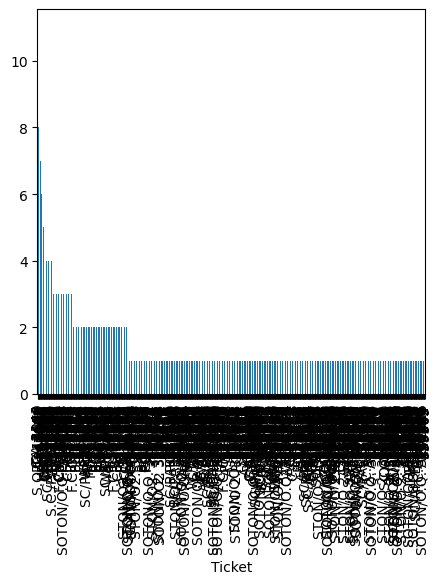

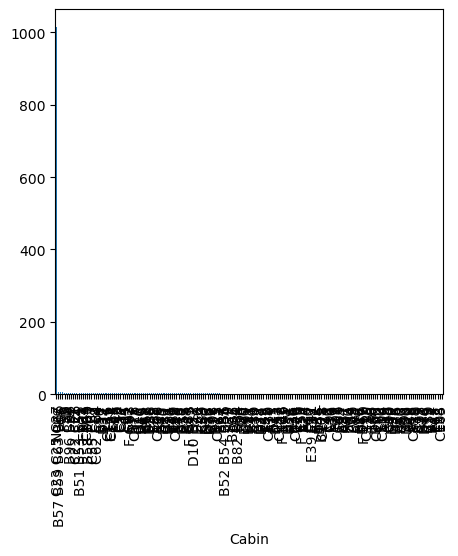

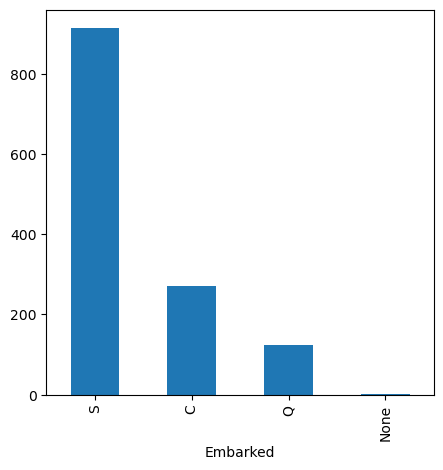

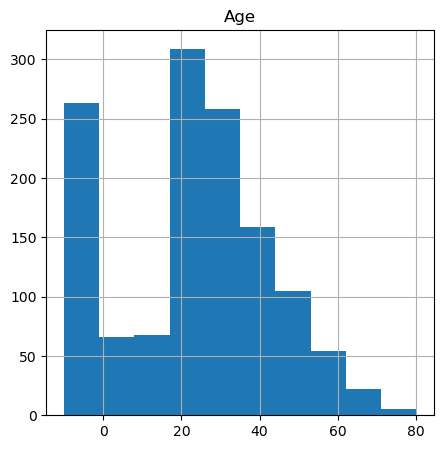

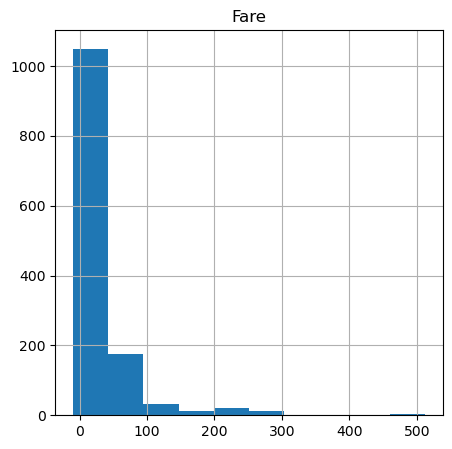

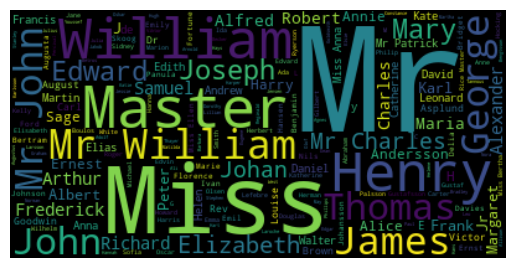

In [3]:
eda = EDA()
eda.load()
eda.print()
eda.plot()

In [64]:
from base.process import Process

In [65]:
process = Process()

In [66]:
process.load()

In [67]:
# process.skew()

In [68]:
process.fill()

In [69]:
process.feature_engineer()

In [70]:
# process.cap()

In [71]:
process.scale()

In [72]:
process.encode()

In [73]:
process.impute()

No missing values


In [ ]:
process.outliers()

In [74]:
process.smote()

In [75]:
process.rfe(grid=True)

In [76]:
process.split()

In [77]:
process.save()

In [1]:
import os
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
cwd = os.getcwd()
data = {
    i: pd.read_csv(cwd + f'/data/{i}.csv', index_col=0, header=0)
    for i in ['x_train','y_train','x_test','y_test','x_predict']
}
print(data['x_train'].shape)
display(data['x_train'].head())
display(data['y_train'].head())

(712, 29)


,Age,Ticket,Fare,Mr,Mrs,Miss,Master,Pclass_2,Pclass_3,Sex_male,...,Parch_5,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
332,1.084146,-0.222408,0.402219,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
734,-0.477638,-0.389559,-0.376482,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
383,0.147076,-0.445705,-0.829644,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
705,-0.269400,0.245717,-0.837500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
814,-1.657652,0.239904,0.497768,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,Survived
PassengerId,
332,0
734,0
383,0
705,0
814,0


In [3]:
from base.model import Model,MODELS

In [4]:
models = [
    Model(**{
        'run_grid': False,
        **data,
        **m,
    })
    for m in MODELS
    if m['name'] in [
        # 'xgb',
        'cat', 
        'log','knn',
    ]
]

In [5]:
for model in models:
    print(model.name.upper())
    model.run('test')
    model.run('main')
    model.eval()

CAT
fitting model...
making predictions...
setting attributes...
fitting model...
making predictions...
setting attributes...
LOG
fitting model...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93521D+02    |proj g|=  1.46500D+02

At iterate   50    f=  2.99088D+02    |proj g|=  3.74243D-03
making predictions...

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   30     57     63      1     0     0   4.780D-03   2.991D+02
  F =   299.08808936960224     

CONVERGENCE: REL_REDUCTI

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWar

In [6]:
meta = Model(**{
        'x_train': pd.concat([model.pred_train for model in models],axis=1),
        'y_train': models[0].y_train,
        'x_test': pd.concat([model.pred_test for model in models],axis=1),
        'y_test': models[0].y_test,
        'x_predict': pd.concat([model.pred_main for model in models],axis=1),
        'run_grid': False,
        'name': 'meta',
        'model': LogisticRegression,
        'params': None,
    })

meta.run('test')
meta.run('main')
meta.eval()

fitting model...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93521D+02    |proj g|=  1.07000D+02


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     15      1     0     0   3.838D-05   1.989D+02
  F =   198.86485557576341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
making predictions...
setting attributes...
fitting model...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17594D+02    |proj g|=  1.27500D+02
making predictions...

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = tota

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [7]:
eval = pd.DataFrame([
    {'model': model.name,'accuracy': model.accuracy,'recall': model.recall,}
    for model in models+[meta]
]).sort_values('accuracy',ascending=False)

<Axes: xlabel='model'>

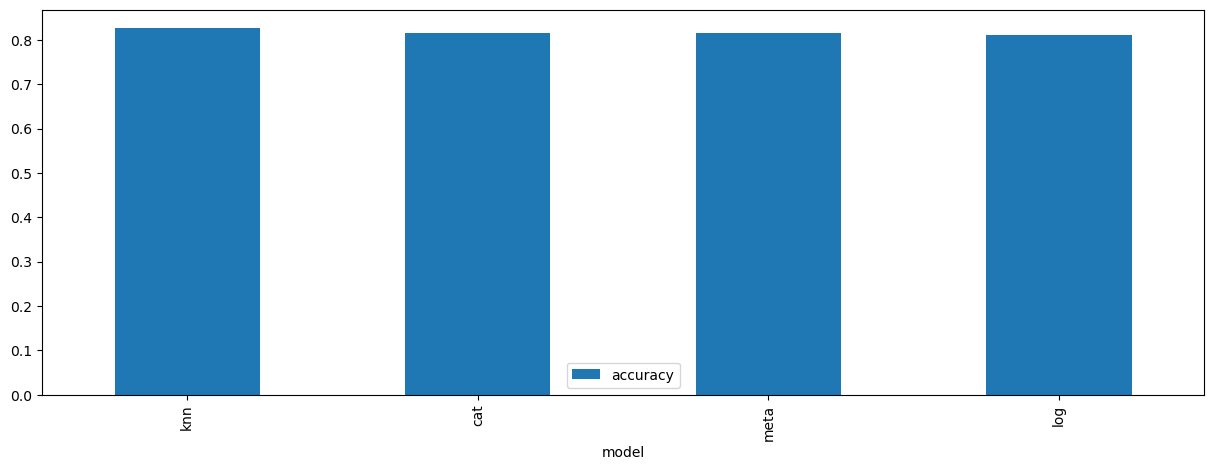

In [8]:
eval.plot(kind='bar',x='model',y=['accuracy'],figsize=(15,5))

In [11]:
for model in models:
    if model.name=='cat':
        model.pred_main.rename('Survived').astype(int).to_csv(os.path.join('~','Downloads','pred.csv'),index=True)